## What are the most demanded skills for the top 3 most popular data roles? 

In [39]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [40]:
df_US = df[df['job_country'] == 'United States']

In [41]:
df_skills = df_US.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [42]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skills_count')

df_skills_count.sort_values(by='skills_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skills_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [43]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

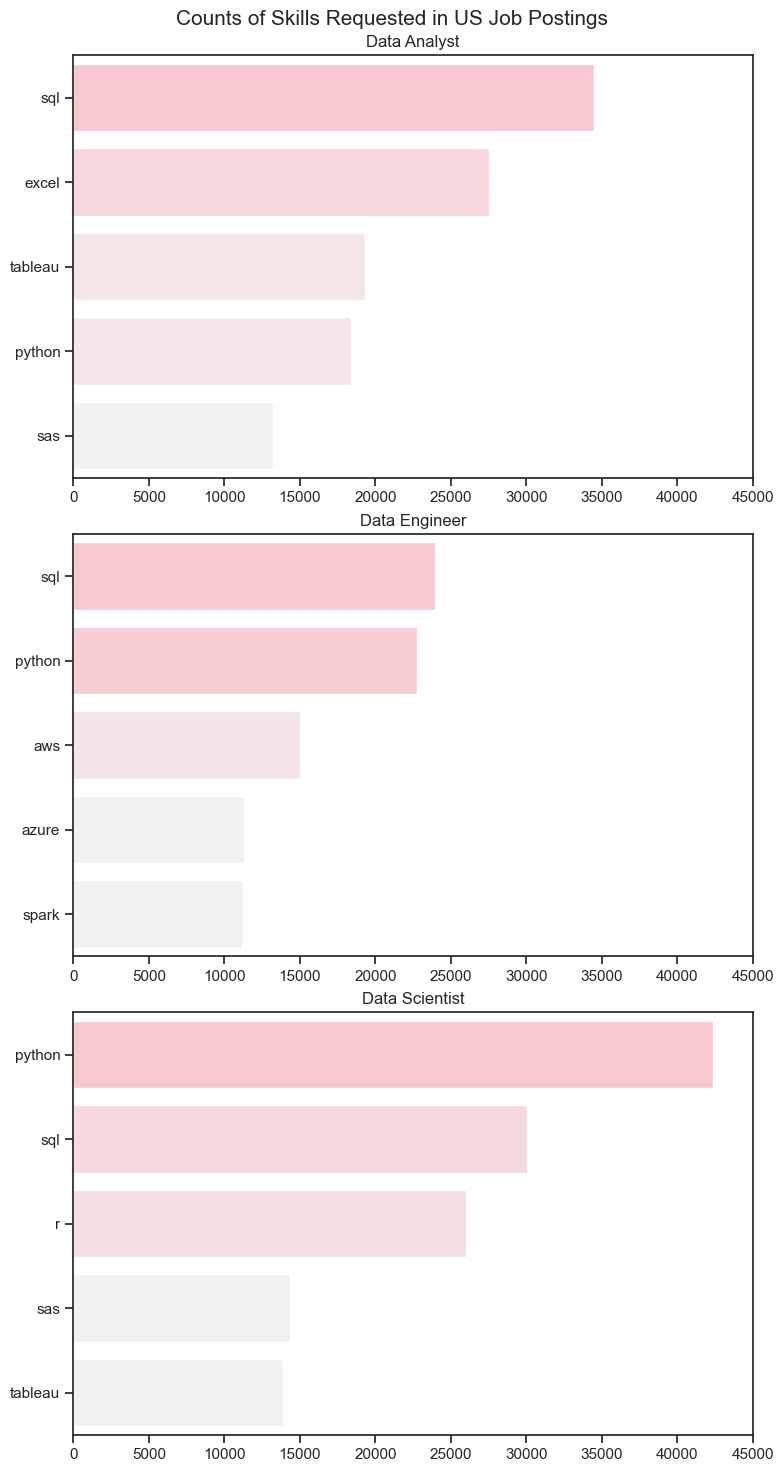

In [44]:

fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, 5 * len(job_titles)))

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    
    # Normalize skills_count to create the color mapping
    norm = plt.Normalize(df_plot['skills_count'].min(), df_plot['skills_count'].max())
    
    # Generate shades of pink (light to dark)
    colors = sns.light_palette("pink", as_cmap=True)
    
    sns.barplot(
        data=df_plot,
        x='skills_count',
        y='job_skills',
        hue='job_skills',  # Set hue to avoid deprecation warning
        dodge=False,
        palette=[colors(norm(x)) for x in df_plot['skills_count']],
        ax=ax[i],
        legend=False   # Turn off the legend directly
    )
    
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 45000)  # keep the same x scale

    # Safely remove legend if it exists
    if ax[i].get_legend() is not None:
        ax[i].get_legend().remove()

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()




In [49]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [58]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skills_precent'] = 100 * df_skills_perc['skills_count'] / df_skills_perc['jobs_total']

df_skills_perc

,job_skills,job_title_short,skills_count,jobs_total,skills_precent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


/var/folders/kb/8cgxxf3d73s1kvkgr7n4jpzm0000gn/T/ipykernel_80112/1115296485.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/kb/8cgxxf3d73s1kvkgr7n4jpzm0000gn/T/ipykernel_80112/1115296485.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/kb/8cgxxf3d73s1kvkgr7n4jpzm0000gn/T/ipykernel_80112/1115296485.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


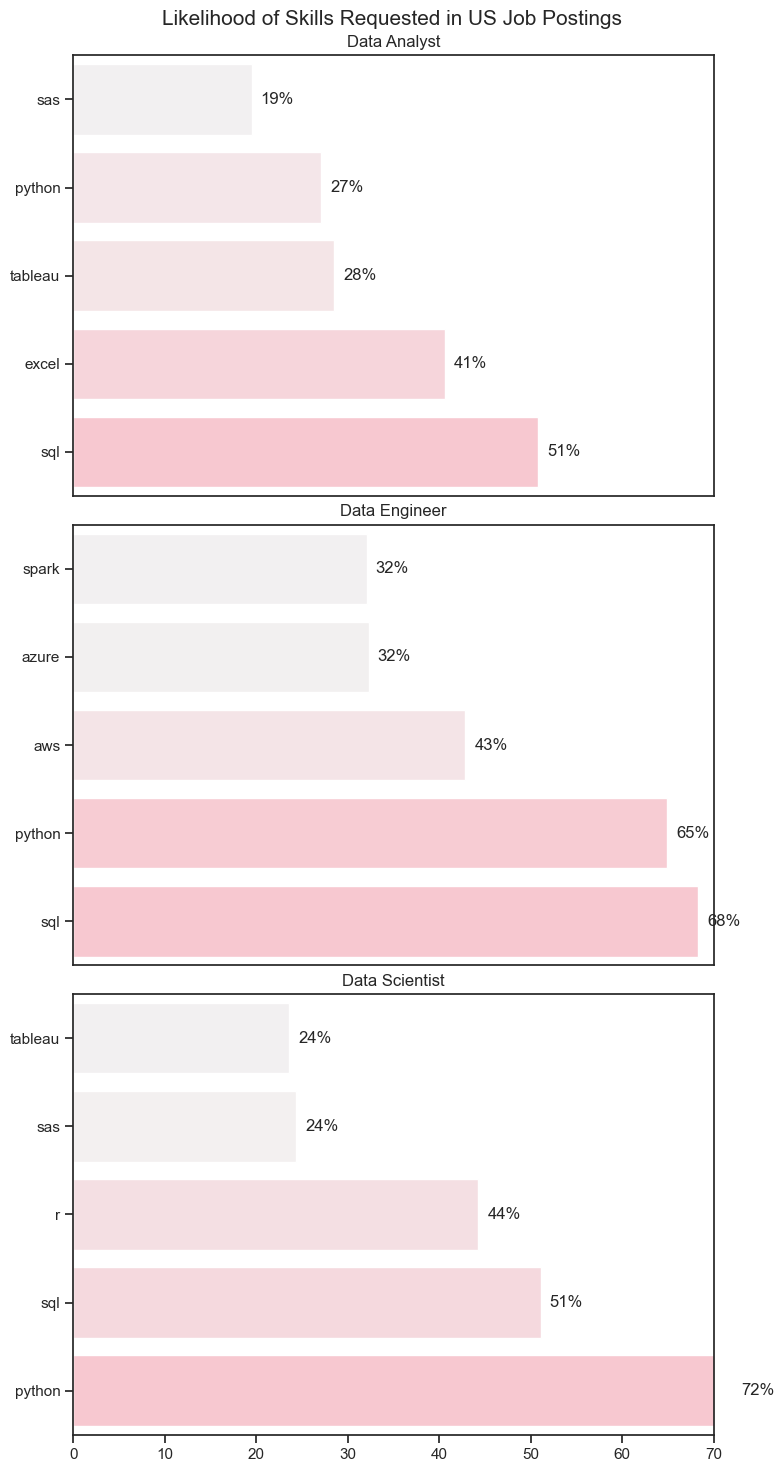

In [74]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, 5 * len(job_titles)))

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    
    # Normalize skill percentages for color shading
    norm = plt.Normalize(df_plot['skills_precent'].min(), df_plot['skills_precent'].max())
    
    # Create a pink colormap
    colors = sns.light_palette("pink", as_cmap=True)
    
    sns.barplot(
        data=df_plot,
        x='skills_precent',
        y='job_skills',
        ax=ax[i],
        palette=[colors(norm(x)) for x in df_plot['skills_precent']],  # Pink gradient
        dodge=False,
        legend=False
    )
    
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    
    # Only remove legend if it exists
    if ax[i].get_legend() is not None:
        ax[i].get_legend().remove()
    
    ax[i].set_xlim(0, 70)  # Set same x limit for consistency
    
    # Add percentage labels next to bars
    for n, v in enumerate(df_plot['skills_precent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    # Remove x-ticks except for the last plot
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

